<div style="text-align: left; background-color:#F19F9F; font-family: Trebuchet MS; color:#494545; padding: 20px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 40px"> Pneumonia Detection using CNN
</div>



![image.png](https://upload.wikimedia.org/wikipedia/commons/2/20/Symptoms_of_pneumonia.svg)


# Objective

The aim of this kernel is to provide all the tips and tricks required to train image classification model on Pneumonia image dataset in a single page.This kernel will hold almost all steps and steps required to implement image classification algorithm using SOTA such as ResNET on Pnemonia Dataset.It could be a great time saver for you.Just utilize it anytime when you are working on Image Classification.

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of content</h3>

<font color="blue" size=+1><b>Introduction</b></font>
* [1. What is Peumonia ?](#1)
* [2. What is CNN ?](#2) 

<font color="blue" size=+1><b>Library</b></font>
* [1. Installation](#4)
* [2. Import Libraries ](#5)
    
<font color="blue" size=+1><b> Load and view your data </b></font>
* [1. Setting up path for training data ](#6)
* [2. Data Loading For training ](#7)
* [3. Data Explorations ](#8)
* [4. Print Classes present in the data ](#9)

<font color="blue" size=+1><b> Create and train a model </b></font>
* [1. Create Models ](#10)
* [2. Train Model ](#11)
* [3. Finding LR ](#12)
* [4. Finetuning HyperParameter](#13)

<font color="blue" size=+1><b> Others </b></font>
* [1. Interpret the results](#14)
* [2. Prediction Using Trained Model](#15)
* [3. Save and Load Model](#16)
* [4. Sources](#17)

<a id="1"></a>
<font color="blue" size=+2.5><b>1.1  What is Pneumonia ?</b></font>
<br/>
<br/>

**Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**


<a id="2"></a>
<font color="blue" size=+2.5><b>1.2  What is CNN ?</b></font>
<br/>
<br/>
**CNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification.**

## <div style="text-align: left; background-color:#CFD9F1; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Importing Library </div>

In [1]:
#Importing dataframe library 
import pandas as pd
import numpy as np
import glob
import os
from pathlib import Path
#Keras Libraries 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

#importing library for plotting
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
#Loading the image data
data_dir=Path("../input/chest-xray-pneumonia/chest_xray/")

<h1>Our data is located in three folders:</h1>
<b>train= contains the training data/images for teaching our model.

 val= contains images which we will use to validate our model.
 
test = this contains the data that we use to test the model once it has learned the relationships between the images and their label (Pneumonia/Not-Pneumonia) </b>

<b>The purpose of this data set is to prevent our model from Overfitting. Overfitting is when your model gets a little too comofortable with the training data and can't handle data.
</b>


In [3]:
#Separating the train, validate and test data
train_data_dir=data_dir/'train'
valida_data_dir=data_dir/'val'
test_data_dir=data_dir/'test'

In [4]:
#Identifying the normal and pneumonia case
normal_case_dir=train_data_dir/'NORMAL'
pneumonia_case_dir=train_data_dir/'PNEUMONIA'
normal_cases=normal_case_dir.glob('*.jpeg')
pneumonia_cases=pneumonia_case_dir.glob('*.jpeg')
train_data=[]

#All the normal_cases images in label 0
for img in normal_cases:
    train_data.append((img,0))
   
  
# All the pneumonia cases images in label 1
for img in pneumonia_cases:
    train_data.append((img,1))
    

In [5]:
#putting image and label data
train_data=pd.DataFrame(train_data, columns=['image','label'],index=None)

train_data.head()

,image,label
0,../input/chest-xray-pneumonia/chest_xray/train...,0
1,../input/chest-xray-pneumonia/chest_xray/train...,0
2,../input/chest-xray-pneumonia/chest_xray/train...,0
3,../input/chest-xray-pneumonia/chest_xray/train...,0
4,../input/chest-xray-pneumonia/chest_xray/train...,0


<h1> Validation </h1>

In [6]:
#normal and pneumonia case dir
normal_case_dir=valida_data_dir/'NORMAL'
pneumonia_case_dir=valida_data_dir/'PNEUMONIA'

In [7]:
#Identifying normal and pneumonia case
normal_cases=normal_case_dir.glob('*.jpeg')
pneumonia_cases=pneumonia_case_dir.glob('*.jpeg')
validation_data=[]
#All the images for level 0
for img in normal_cases:
    validation_data.append((img,0))
    
#All the images for level 1    
    
for img in pneumonia_cases:
    validation_data.append((img, 1))

In [8]:
#Putting validation image and label data
val_data=pd.DataFrame(validation_data, columns=['image', 'lavel'])
val_data.head()

,image,lavel
0,../input/chest-xray-pneumonia/chest_xray/val/N...,0
1,../input/chest-xray-pneumonia/chest_xray/val/N...,0
2,../input/chest-xray-pneumonia/chest_xray/val/N...,0
3,../input/chest-xray-pneumonia/chest_xray/val/N...,0
4,../input/chest-xray-pneumonia/chest_xray/val/N...,0


<h1>Test data </h1>

In [9]:
#Getting the test image data
test_path=os.path.join("../input/chest-xray-pneumonia/chest_xray/","test")
test_normal=glob.glob(test_path +"/NORMAL/*.jpeg")
test_pneumonia=glob.glob(test_path +"/PNEUMONIA/*.jpeg")

In [10]:
#Putting the test image and label
test_data=[]
#All the imges in lebel 0
for img in test_normal:
    test_data.append((img, 0))
    
# All the images in label 1    
for img in test_pneumonia:
    test_data.append((img, 1))

In [11]:
#Test image and label data
test_data=pd.DataFrame(test_data, columns=['images', 'label'], index=None)

In [12]:
#Displaying the test data
test_data.head()

,images,label
0,../input/chest-xray-pneumonia/chest_xray/test/...,0
1,../input/chest-xray-pneumonia/chest_xray/test/...,0
2,../input/chest-xray-pneumonia/chest_xray/test/...,0
3,../input/chest-xray-pneumonia/chest_xray/test/...,0
4,../input/chest-xray-pneumonia/chest_xray/test/...,0


<h1> CNN model Design </h1>

<h1>CONVOLUTIONAL NEURAL NETWORKS TO THE RESCUE </h1>
A Convolutional Neural Network is a special type of an Artificial Intelligence implementation which uses a special mathematical matrix manipulation called the convolution operation to process data from the images.

A convolution does this by multiplying two matrices and yielding a third, smaller matrix.
The Network takes an input image, and uses a filter (or kernel) to create a feature map describing the image.
In the convolution operation, we take a filter (usually 2x2 or 3x3 matrix ) and slide it over the image matrix. The coresponding numbers in both matrices are multiplied and and added to yield a single number describing that input space. This process is repeated all over the image.This can be seen in the following animation

We use different filters to pass over our inputs, and take all the feature maps, put them together as the final output of the convolutional layer.
We then pass the output of this layer through a non-linear activation function. The most commonly used one is ReLU.

The next step of our process involves further reducing the dimensionality of the data which will lower the computation power required for training this model. This is achieved by using a Pooling Layer. The most commonly used one is max pooling which takes the maximum value in the window created by a filter. This significantly reduces the training time and preserves significant information.

STRIDE: Stride just means the amount a filter moves during a covolution operation. So, a stride of 1 means that the filter will slide 1 pixel after each covolution operation as shown in this animation.

PADDING: Padding is just zero value pixels that surround the input image. This protects the loss of any valuable information since the feature map is ever shrinking.

In [13]:
#Building the CNN model
model=tf.keras.Sequential()

#Defining the CNN input
model.add(tf.keras.Input(shape=(150,150,3)))

#Convolutional 
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,padding='same', activation='relu'))

#Convolutional 
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides= (2,2),padding='same', activation='relu'))

#Pooling 
model.add(tf.keras.layers.MaxPool2D())

#Convolutional 
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),strides = 1,padding='same', activation='relu'))

#Pooling 
model.add(tf.keras.layers.MaxPool2D())

2023-01-08 03:47:58.213148: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
#Flatten the layer
model.add(tf.keras.layers.Flatten())
#Fully Connected Layers
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               2

In [15]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [16]:
train_dtgen=ImageDataGenerator(rescale=1. / 255,      # Normalize colour intensities in 0-1 range
                              shear_range=0.2,       # Shear varies from 0-0.2
                              zoom_range=0.2,
                              horizontal_flip=True,)

In [17]:
#Fitting the CNN to the images
#The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_generator=train_dtgen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/train",
                                               batch_size=32,
                                                target_size = (150, 150),
                                                class_mode = 'binary'
                                               )

Found 5216 images belonging to 2 classes.


In [18]:
#The validation ImageDataGenerator augments image by iterating through image to CNN
test_datagen=ImageDataGenerator(rescale = 1./255)
validation_generator=test_datagen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/val",
                                               batch_size=64,
                                                target_size = (150, 150),
                                                class_mode = 'binary'
                                               )

Found 16 images belonging to 2 classes.


In [19]:
#The test ImageDataGenerator augments image by iterating through image to CNN
test_set=test_datagen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/test",
                                               batch_size=30,
                                                target_size = (150, 150),
                                                class_mode = 'binary'
                                               )

Found 624 images belonging to 2 classes.


In [20]:
batch_size = 32

# Define the number of training steps
nb_train_steps = train_data.shape[0]//batch_size
nb_train_steps

163

In [21]:
#Fitting the CNN model
cnn_model=model.fit(train_generator,
          steps_per_epoch = nb_train_steps,
          epochs = 5,
          batch_size = 32,
          validation_data=validation_generator,
          validation_steps =16
        )

2023-01-08 03:48:03.687360: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
163/163 [==============================] - 219s 1s/step - loss: 0.4912 - accuracy: 0.8075 - val_loss: 0.5665 - val_accuracy: 0.8125
Epoch 2/5
163/163 [==============================] - 192s 1s/step - loss: 0.2605 - accuracy: 0.8926
Epoch 3/5
163/163 [==============================] - 191s 1s/step - loss: 0.2142 - accuracy: 0.9176
Epoch 4/5
163/163 [==============================] - 191s 1s/step - loss: 0.1974 - accuracy: 0.9248
Epoch 5/5
163/163 [==============================] - 191s 1s/step - loss: 0.1733 - accuracy: 0.9390


In [22]:
#Predicting the CNN model
test_accu=model.predict(test_set)


In [23]:
test_accu[:5]

array([[0.03112489],
       [0.622554  ],
       [0.99999845],
       [0.9999919 ],
       [0.99999523]], dtype=float32)

In [24]:
# batch of (images, image_labels)
im = test_set    # Get iterator
images = next(im)      # Get images
images[0].shape

(30, 150, 150, 3)

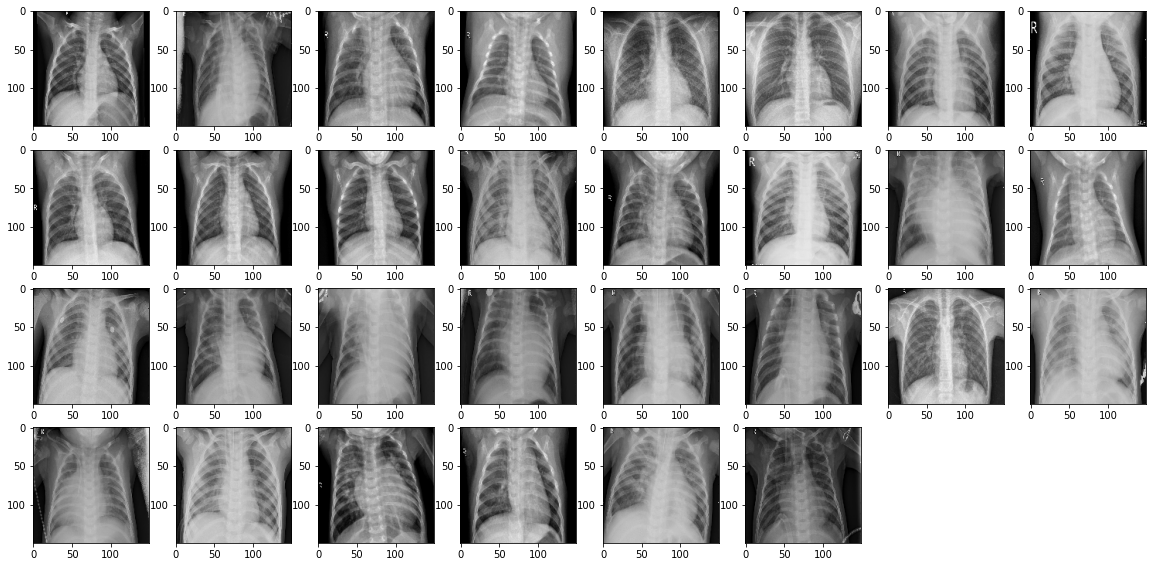

In [25]:
# 9.1 Make predictions
results = model.predict(images[0])

# 9.2 Plot the images and check with
#     results
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.figure(figsize= (20,20))
for i in range(results.shape[0]):
    plt.subplot(8,8,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;